In [4]:
import pandas as pd

# Carica il dataset
df = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Machine Learning\\beer_data\\beer_reviews.csv')

# Visualizza un'anteprima del dataset
print(df.head())


   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stou

In [5]:
#La Principal Component Analysis (PCA) è una tecnica di riduzione della dimensionalità utilizzata per trasformare un dataset con molte variabili in un numero inferiore di variabili

# Seleziona solo le colonne necessarie per la PCA
columns_to_use = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
pca_data = df[columns_to_use]

# Controlla i valori mancanti
print(pca_data.isnull().sum())


review_overall           0
review_aroma             0
review_appearance        0
review_palate            0
review_taste             0
beer_abv             67785
dtype: int64


In [6]:
# Sostituisci i valori mancanti con la media di ogni colonna
pca_data = pca_data.fillna(pca_data.mean())


In [7]:
#Usiamo lo StandardScaler di sklearn per normalizzare i dati (media 0 e deviazione standard 1).
from sklearn.preprocessing import StandardScaler

# Normalizza i dati
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)


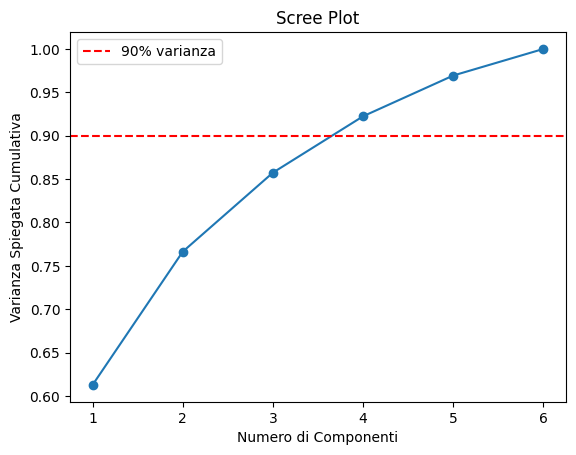

In [8]:
#Applichiamo la PCA e calcoliamo la varianza
from sklearn.decomposition import PCA

# Inizializza la PCA senza specificare il numero di componenti
pca = PCA()

# Adatta la PCA ai dati normalizzati
pca.fit(pca_data_scaled)

# Calcola la varianza spiegata cumulativa
explained_variance = pca.explained_variance_ratio_.cumsum()

# Visualizza il numero di componenti necessarie per spiegare il 90% della varianza
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% varianza')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Scree Plot')
plt.legend()
plt.show()


In [9]:
#Dopo aver deciso il numero di componenti (es. quelli che spiegano almeno il 90% della varianza), riduciamo i dati.
# Riduzione dei dati con PCA
num_components = sum(explained_variance < 0.90) + 1  # Componenti per spiegare il 90% della varianza
pca = PCA(n_components=num_components)
pca_data_reduced = pca.fit_transform(pca_data_scaled)

print(f'Dati ridotti a {num_components} componenti principali.')


Dati ridotti a 4 componenti principali.


In [ ]:
#I dati ridotti (pca_data_reduced) possono essere usati per clustering

In [10]:
# Componenti principali
print(pd.DataFrame(pca.components_, columns=columns_to_use))


   review_overall  review_aroma  review_appearance  review_palate  \
0        0.440060      0.436997           0.385474       0.448759   
1       -0.316578      0.046902           0.041985      -0.085053   
2       -0.294646     -0.005350           0.892766      -0.107694   
3       -0.178629      0.823016          -0.128110      -0.503558   

   review_taste  beer_abv  
0      0.470912  0.208921  
1     -0.116028  0.935478  
2     -0.266930 -0.182411  
3      0.048157 -0.135775  


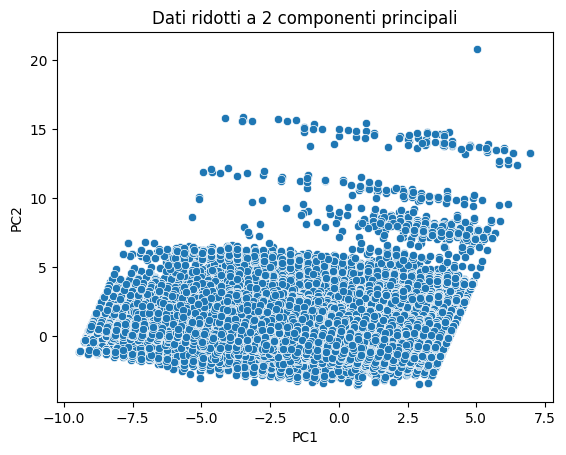

In [11]:
import seaborn as sns

# Usa solo le prime due componenti principali
pca_2d = pca_data_reduced[:, :2]

# Crea un DataFrame per la visualizzazione
pca_df = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])

# Scatter plot
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('Dati ridotti a 2 componenti principali')
plt.show()


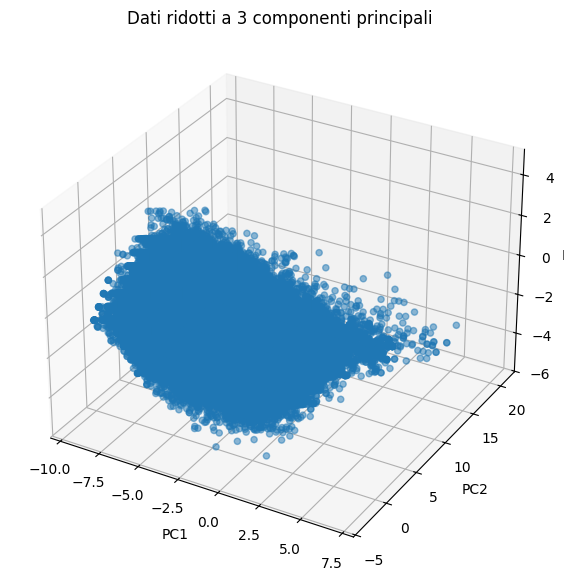

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Usa solo le prime tre componenti principali
pca_3d = pca_data_reduced[:, :3]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Dati ridotti a 3 componenti principali')
plt.show()


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


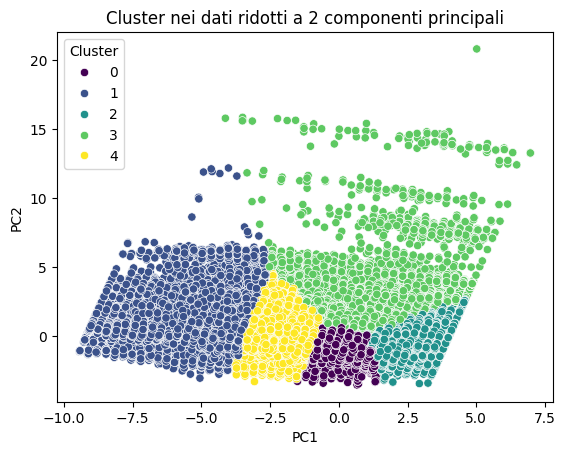

In [13]:
from sklearn.cluster import KMeans

# Applica K-means ai dati ridotti
kmeans = KMeans(n_clusters=5, random_state=42)  # Scegli il numero di cluster
clusters = kmeans.fit_predict(pca_data_reduced)

# Aggiungi i cluster al DataFrame per la visualizzazione
pca_df['Cluster'] = clusters

# Visualizza i cluster
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Cluster nei dati ridotti a 2 componenti principali')
plt.show()


In [14]:
# Contributo delle variabili ai componenti principali
component_contributions = pd.DataFrame(pca.components_, columns=columns_to_use)

print(component_contributions)


   review_overall  review_aroma  review_appearance  review_palate  \
0        0.440060      0.436997           0.385474       0.448759   
1       -0.316578      0.046902           0.041985      -0.085053   
2       -0.294646     -0.005350           0.892766      -0.107694   
3       -0.178629      0.823016          -0.128110      -0.503558   

   review_taste  beer_abv  
0      0.470912  0.208921  
1     -0.116028  0.935478  
2     -0.266930 -0.182411  
3      0.048157 -0.135775  


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dividi i dati
X_train, X_test, y_train, y_test = train_test_split(pca_data_reduced, df['review_overall'], test_size=0.2, random_state=42)

# Addestra un modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Valuta il modello
score = model.score(X_test, y_test)
print(f'R^2 del modello sui dati ridotti: {score:.2f}')


R^2 del modello sui dati ridotti: 0.86


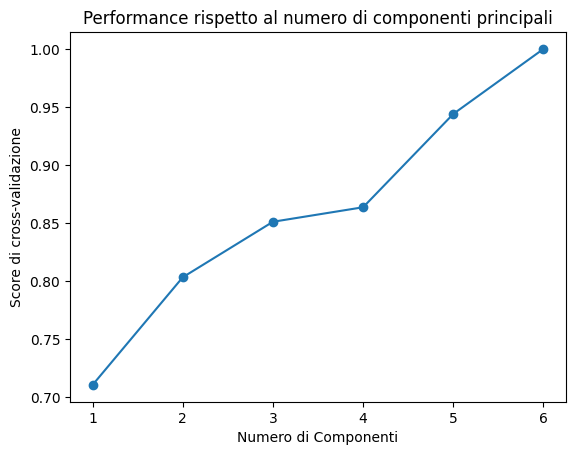

In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = []
for n in range(1, len(columns_to_use) + 1):
    pca = PCA(n_components=n)
    data_reduced = pca.fit_transform(pca_data_scaled)

    # Valutazione con regressione lineare
    score = cross_val_score(LinearRegression(), data_reduced, df['review_overall'], cv=5).mean()
    scores.append(score)

# Visualizza la performance
plt.plot(range(1, len(columns_to_use) + 1), scores, marker='o')
plt.xlabel('Numero di Componenti')
plt.ylabel('Score di cross-validazione')
plt.title('Performance rispetto al numero di componenti principali')
plt.show()


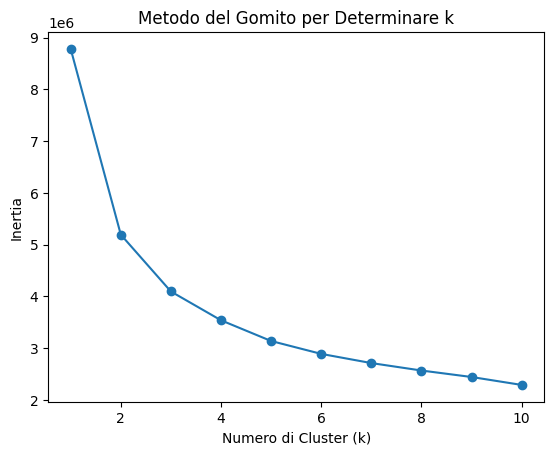

In [17]:
#Calcoliamo l'inertia (somma delle distanze al quadrato dai punti ai centri dei loro cluster) per diversi numeri di cluster e scegliamo quello che minimizza l'inertia senza penalizzare troppo la complessità
from sklearn.cluster import KMeans

# Determina il numero ottimale di cluster
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data_reduced)
    inertia.append(kmeans.inertia_)

# Visualizza il metodo del gomito
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metodo del Gomito per Determinare k')
plt.show()


In [18]:
#Dopo aver scelto k (es. il valore prima che l'inertia si stabilizzi), applichiamo K-means.
# Scegli il numero di cluster in base al grafico precedente
optimal_k = 5  # Modifica questo valore in base al gomito

# Applica K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_data_reduced)

# Aggiungi i cluster al DataFrame originale
pca_df['Cluster'] = clusters


C:\Users\CRAIA-AREA EDUCATORI\Documents\Università\interprete\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


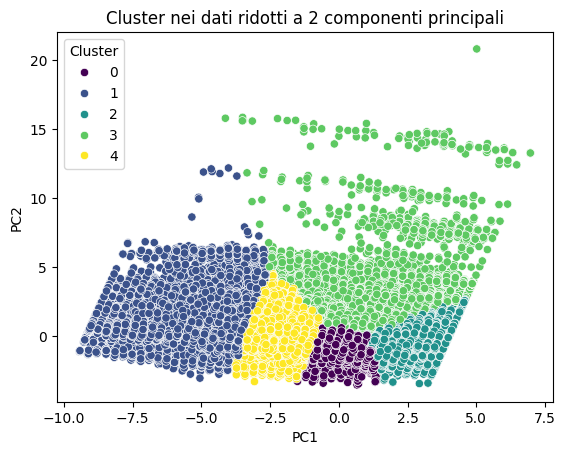

In [19]:
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Cluster nei dati ridotti a 2 componenti principali')
plt.show()


In [ ]:
#I cluster sembrano ben definiti nei dati ridotti a due componenti principali.

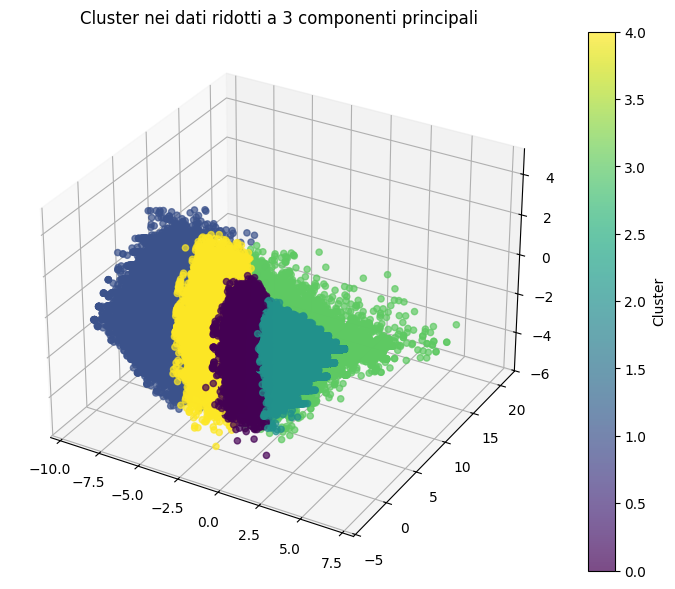

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Cluster nei dati ridotti a 3 componenti principali')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()


In [21]:
# Identifica le caratteristiche principali di ciascun cluster.

# Aggiungi i cluster al DataFrame originale
df['Cluster'] = clusters

# Calcola le medie delle variabili originali per cluster
cluster_summary = df.groupby('Cluster')[columns_to_use].mean()
print(cluster_summary)


         review_overall  review_aroma  review_appearance  review_palate  \
Cluster                                                                   
0              3.980614      3.783787           3.887111       3.827616   
1              2.159894      2.228051           2.669903       2.251718   
2              4.491994      4.359918           4.353071       4.377624   
3              3.883133      4.041494           4.014144       3.981816   
4              3.242962      3.183976           3.424772       3.170974   

         review_taste   beer_abv  
Cluster                           
0            3.896794   5.923886  
1            2.052594   5.652349  
2            4.497832   7.509096  
3            4.059445  10.409018  
4            3.158807   5.966744  


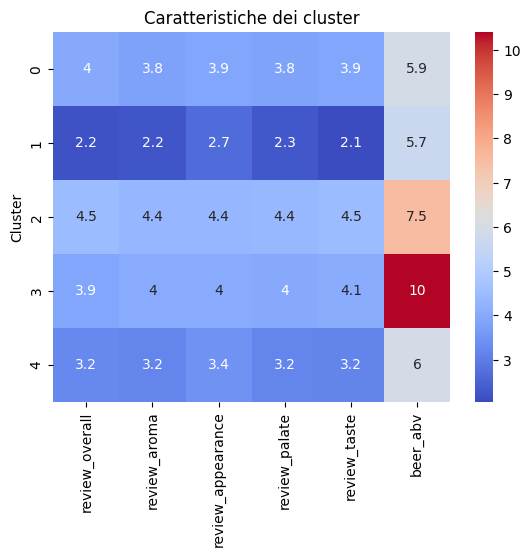

In [22]:
#Crea un grafico a barre o a heatmap per confrontare i cluster
import seaborn as sns

# Heatmap delle medie dei cluster
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title('Caratteristiche dei cluster')
plt.show()


In [23]:
#Esplora quali birre o stili di birra appartengono a ciascun cluster.
#Identifica se ci sono birrifici che dominano uno specifico cluster.

# Conta gli stili di birra per cluster
beer_styles_by_cluster = df.groupby('Cluster')['beer_style'].value_counts()
print(beer_styles_by_cluster)


Cluster  beer_style              
0        American IPA                58987
         American Pale Ale (APA)     35256
         American Porter             25220
         American Amber / Red Ale    21765
         Witbier                     14964
                                     ...  
4        Happoshu                      114
         Lambic - Unblended            108
         Gose                           99
         Eisbock                        89
         Roggenbier                     72
Name: count, Length: 505, dtype: int64


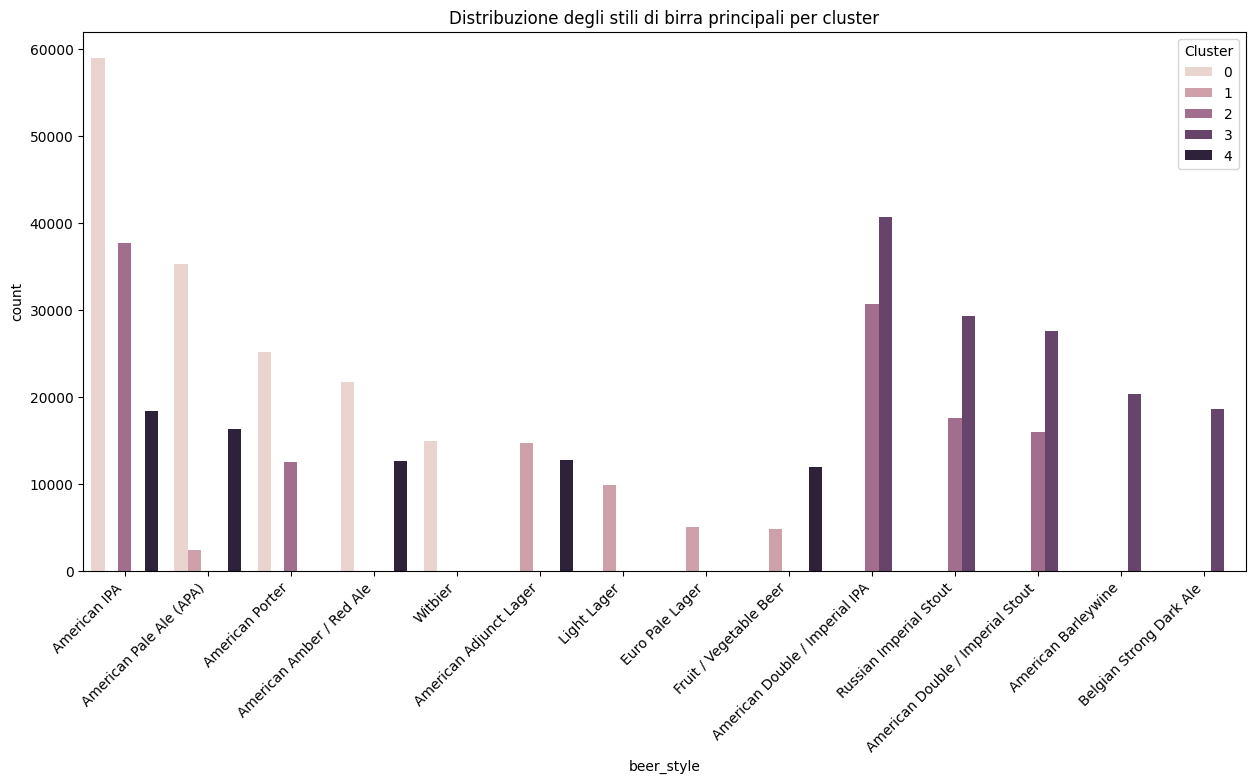

In [24]:
# Prendi i primi 5 stili per cluster
top_styles = df.groupby('Cluster')['beer_style'].value_counts().groupby(level=0).head(5)

# Trasformalo in un DataFrame
top_styles_df = top_styles.reset_index(name='count')

# Grafico a barre
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.barplot(data=top_styles_df, x='beer_style', y='count', hue='Cluster')
plt.xticks(rotation=45, ha='right')
plt.title('Distribuzione degli stili di birra principali per cluster')
plt.show()


In [25]:
# Media della gradazione alcolica e delle recensioni per cluster
cluster_analytics = df.groupby('Cluster')[['beer_abv', 'review_overall']].mean()
print(cluster_analytics)


          beer_abv  review_overall
Cluster                           
0         5.923886        3.980614
1         5.652349        2.159894
2         7.509096        4.491994
3        10.409018        3.883133
4         5.966744        3.242962


In [26]:
# Conta i recensori per cluster
reviewers_per_cluster = df.groupby('Cluster')['review_profilename'].nunique()
print(reviewers_per_cluster)


Cluster
0    20820
1    12138
2    23806
3    14677
4    17109
Name: review_profilename, dtype: int64


In [27]:
#Se qualcuno ha recensito una birra in un cluster, possiamo suggerire birre dello stesso cluster.

# Trova il cluster di una birra specifica
beer_name = "American IPA"
cluster_id = df[df['beer_style'] == beer_name]['Cluster'].mode()[0]

# Suggerisci birre dello stesso cluster
suggested_beers = df[df['Cluster'] == cluster_id]['beer_name'].unique()[:10]
print("Birre consigliate:", suggested_beers)


Birre consigliate: ['Caldera Ginger Beer' 'Caldera OBF 15' 'Rauch Ür Bock' 'Caldera Pale Ale'
 'Pilot Rock Porter' 'Vas Deferens Ale' 'Caldera IPA' 'Dry Hop Red'
 'Southside Strong' 'Caldera Märzen']


In [28]:
# Filtra solo il cluster 4
cluster_4 = df[df['Cluster'] == 4]

# Esamina le medie delle recensioni e la gradazione alcolica
print(cluster_4[['review_overall', 'beer_abv']].mean())

# Mostra gli stili più rappresentati
print(cluster_4['beer_style'].value_counts().head(10))


review_overall    3.242962
beer_abv          5.966744
dtype: float64
beer_style
American IPA                18417
American Pale Ale (APA)     16311
American Adjunct Lager      12800
American Amber / Red Ale    12692
Fruit / Vegetable Beer      11933
American Pale Wheat Ale     10063
Euro Pale Lager              9235
Witbier                      8877
American Porter              8807
English Pale Ale             8666
Name: count, dtype: int64


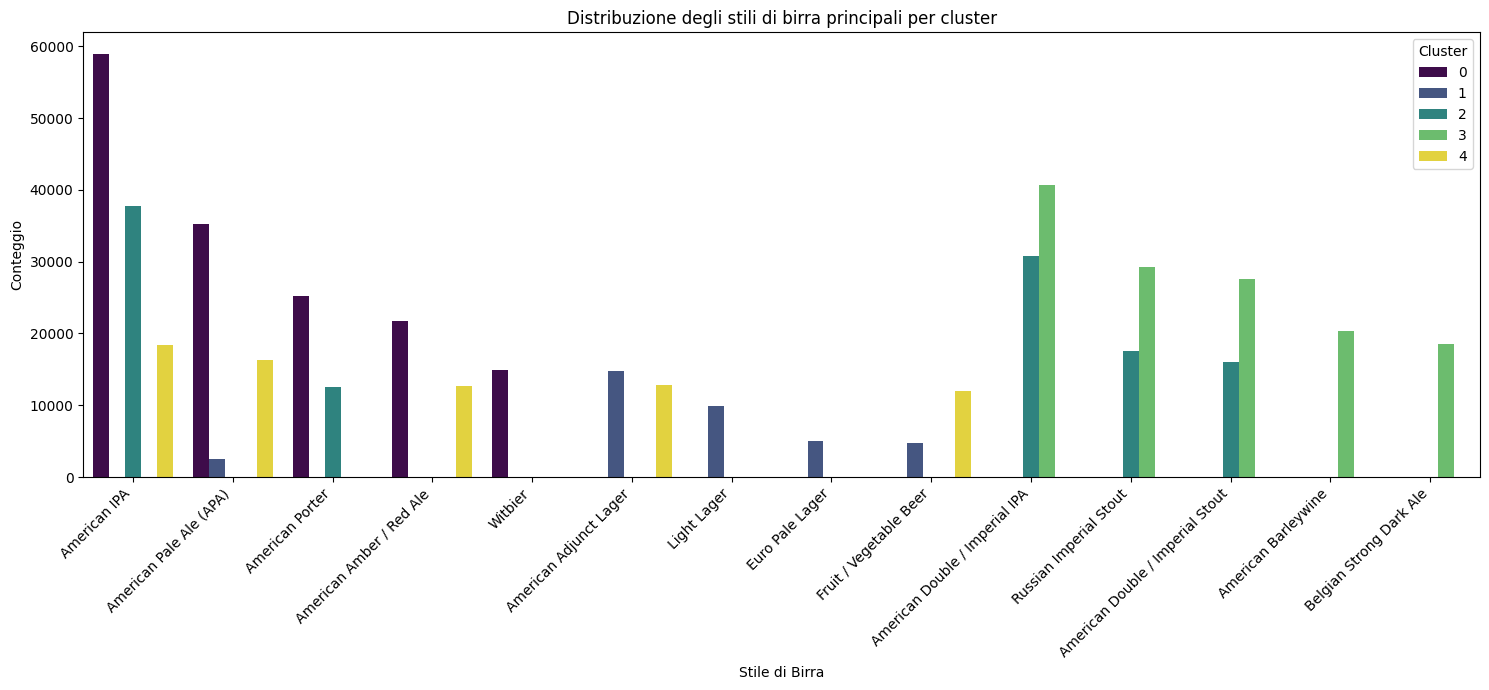

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prendi i primi 5 stili di birra per cluster
top_styles = df.groupby('Cluster')['beer_style'].value_counts().groupby(level=0).head(5)

# Converti in DataFrame per semplificare il grafico
top_styles_df = top_styles.reset_index(name='count')

# Grafico a barre
plt.figure(figsize=(15, 7))
sns.barplot(data=top_styles_df, x='beer_style', y='count', hue='Cluster', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribuzione degli stili di birra principali per cluster')
plt.xlabel('Stile di Birra')
plt.ylabel('Conteggio')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()
